In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Organizing the data

In [2]:
import os
import shutil
import random
import glob
import tensorflow as tf

In [3]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(f"Num GPUs available: {len(physical_devices)}")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available: 1


2022-08-16 21:58:14.338987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 21:58:14.384675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 21:58:14.385133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
train_size = 700
valid_size = 200
test_size = 100

In [5]:
os.chdir("../data/PetImages")

In [6]:
shutil.rmtree("CopyDog")
shutil.rmtree("CopyCat")

In [7]:
shutil.copytree("Dog", "CopyDog")
shutil.copytree("Cat", "CopyCat")

'CopyCat'

In [8]:
shutil.rmtree("train")
shutil.rmtree("test")
shutil.rmtree("valid")

In [9]:
os.makedirs("train/dog")
os.makedirs("test/dog")
os.makedirs("valid/dog")
os.makedirs("train/cat")
os.makedirs("test/cat")
os.makedirs("valid/cat")

In [10]:
for dog in random.sample(glob.glob("CopyDog/*"), test_size):
    shutil.move(dog, "test/dog")
for dog in random.sample(glob.glob("CopyDog/*"), valid_size):
    shutil.move(dog, "valid/dog")
for dog in random.sample(glob.glob("CopyDog/*"), train_size):
    shutil.move(dog, "train/dog")
for cat in random.sample(glob.glob("CopyCat/*"), test_size):
    shutil.move(cat, "test/cat")
for cat in random.sample(glob.glob("CopyCat/*"), valid_size):
    shutil.move(cat, "valid/cat")
for cat in random.sample(glob.glob("CopyCat/*"), train_size):
    shutil.move(cat, "train/cat")


In [11]:
os.chdir("../../src")

## Loading the data

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [13]:
train_path = "../data/PetImages/train"
test_path = "../data/PetImages/test"
valid_path = "../data/PetImages/valid"

In [14]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [15]:
imgs, labels = next(train_batches)

In [16]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

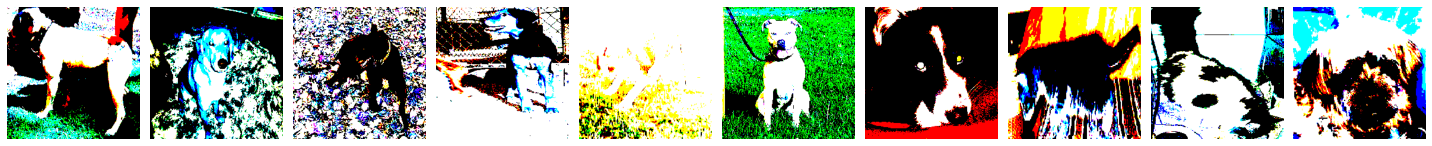

In [17]:
plot_images(imgs)

## Building the model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation="softmax")
])

2022-08-16 21:58:33.979462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-16 21:58:33.980985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 21:58:33.981410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 21:58:33.981562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

## Compiling the model

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10


2022-08-16 21:58:36.886313: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


140/140 - 8s - loss: 16.9463 - accuracy: 0.5707 - val_loss: 5.0329 - val_accuracy: 0.6400 - 8s/epoch - 60ms/step
Epoch 2/10
140/140 - 5s - loss: 2.6099 - accuracy: 0.7629 - val_loss: 7.6140 - val_accuracy: 0.5550 - 5s/epoch - 33ms/step
Epoch 3/10
140/140 - 5s - loss: 0.9417 - accuracy: 0.8621 - val_loss: 3.3410 - val_accuracy: 0.6825 - 5s/epoch - 33ms/step
Epoch 4/10
140/140 - 5s - loss: 0.1943 - accuracy: 0.9479 - val_loss: 2.8978 - val_accuracy: 0.6950 - 5s/epoch - 33ms/step
Epoch 5/10
140/140 - 5s - loss: 0.0711 - accuracy: 0.9750 - val_loss: 2.4504 - val_accuracy: 0.7025 - 5s/epoch - 33ms/step
Epoch 6/10
140/140 - 5s - loss: 0.0770 - accuracy: 0.9786 - val_loss: 2.6676 - val_accuracy: 0.7025 - 5s/epoch - 34ms/step
Epoch 7/10
140/140 - 5s - loss: 0.0335 - accuracy: 0.9900 - val_loss: 2.8716 - val_accuracy: 0.6925 - 5s/epoch - 33ms/step
Epoch 8/10
140/140 - 5s - loss: 0.0204 - accuracy: 0.9914 - val_loss: 2.7987 - val_accuracy: 0.7025 - 5s/epoch - 34ms/step
Epoch 9/10
140/140 - 5s - 

## Testing the model

In [24]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title="Confusion matrix",
                        cmap=plt.cm.Blues
                        ):
    """This function plots a confusion matrix"""
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    thresh = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [26]:
predictions = model.predict(x=test_batches, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)

In [27]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=rounded_predictions)

Confusion matrix, without normalization


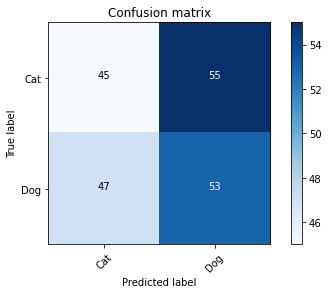

In [28]:
cm_plot_labels = ["Cat", "Dog"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

## Saving the model

In [29]:
def save_model(model, filename, dir):
    file_loc = os.path.join(dir, filename)
    if not os.path.isfile(file_loc):
        model.save(file_loc)

In [30]:
model_dir = os.path.abspath(os.path.join("..", "models"))
filename = "cats_vs_dogs_v1.h5"
save_model(model, filename, model_dir)

## Loading VGG16 model

In [31]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [32]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Change output layer to be binary

In [33]:
import copy

In [34]:
model_v2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    layer_copy = copy.deepcopy(layer)
    layer_copy.trainable = False
    model_v2.add(layer_copy)

output_layer = Dense(units=2, activation="softmax")
model_v2.add(output_layer)

In [35]:
model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

## Train output layer of V2 of model

In [36]:
model_v2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:
model_v2.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5


2022-08-16 21:59:31.414258: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-16 21:59:31.414304: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-16 21:59:31.414318: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-16 21:59:31.414330: W tensorflow/core/common_runtime/bfc_allocato

140/140 - 32s - loss: 0.2421 - accuracy: 0.9043 - val_loss: 0.1441 - val_accuracy: 0.9425 - 32s/epoch - 228ms/step
Epoch 2/5
140/140 - 28s - loss: 0.0705 - accuracy: 0.9743 - val_loss: 0.1031 - val_accuracy: 0.9575 - 28s/epoch - 202ms/step
Epoch 3/5
140/140 - 28s - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0899 - val_accuracy: 0.9650 - 28s/epoch - 203ms/step
Epoch 4/5
140/140 - 29s - loss: 0.0390 - accuracy: 0.9900 - val_loss: 0.0831 - val_accuracy: 0.9700 - 29s/epoch - 205ms/step
Epoch 5/5
140/140 - 29s - loss: 0.0307 - accuracy: 0.9929 - val_loss: 0.0819 - val_accuracy: 0.9650 - 29s/epoch - 204ms/step


In [38]:
predictions_v2 = model_v2.predict(x=test_batches, verbose=0)
rounded_predictions_v2 = np.argmax(predictions_v2, axis=-1)

In [46]:
print(test_batches.classes)

200


In [39]:
cm_v2 = confusion_matrix(y_true=test_batches.classes, y_pred=rounded_predictions_v2)

Confusion matrix, without normalization


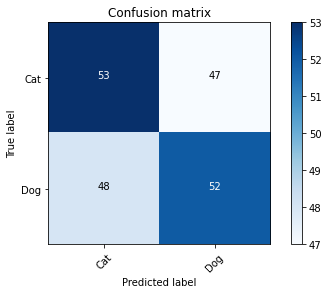

In [40]:
cm_plot_labels = ["Cat", "Dog"]
plot_confusion_matrix(cm=cm_v2, classes=cm_plot_labels)

In [41]:
filename = "cats_vs_dogs_v2.h5"
save_model(model_v2, filename, model_dir)

In [42]:
print(np.mean(valid_batches.classes))
print(np.mean(test_batches.classes))
print(np.mean(train_batches.classes))

0.5
0.5
0.5
